In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Function definitions
def payload_i (x,y,beta_i):
    Hi=np.exp(-beta_i *y/x) -x**2 *(1-np.exp(-y/x))
    return Hi


def payload_mission(x,y,sequence):
    H_list=[]
    for beta_i in sequence:
        H_list.append(payload_i(x,y,beta_i))
    Hm=np.min(H_list)
    return Hm


def time_coeff (x,y,sequence):
    mp_refuel= np.sum(1-np.exp(-sequence *y/x))
    mp_star=1-np.exp(-y/x)
    tau=mp_refuel/mp_star
    return tau


def specific_fuel_cons(x,y,sequence):
    mp_refuel= np.sum(1-np.exp(-sequence *y/x))
    Hm=payload_mission(x,y,sequence)
    f=mp_refuel/Hm
    return f


# Optimization of $H_m$ as a function of $n$

In [3]:
def opt_H(x,y,n):
    return np.exp(-(1/n) *y/x) -x**2 *(1-np.exp(-y/x))


def mass_prop(x,y,n):
    return  1-np.exp(-(1/n) *y/x)

def H_infty(x,y):
    return 1 -x**2 *(1-np.exp(-y/x))

In [4]:
y=0.8
x=0.4
K=0

n=np.arange(1,51,1)
H_opt=opt_H(x,y,n)
m_prop=mass_prop(x,y,n)
limit_H=H_infty(x,y)
limit_H

0.861653645317858

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


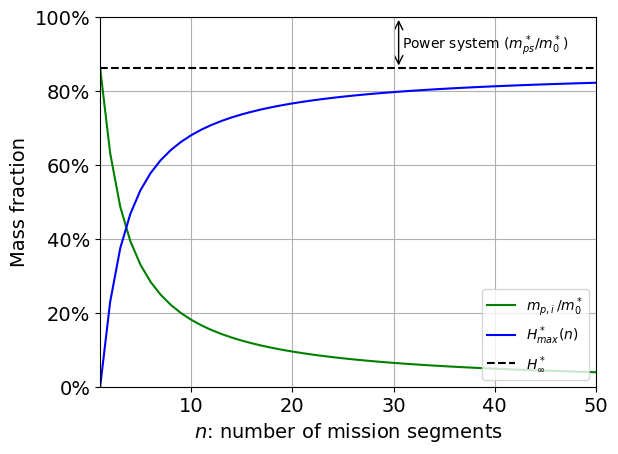

In [5]:
fig=plt.plot(figsize=(8,8),dpi=150)
plt.plot(n,m_prop,"g-",label=rf"$m_{{p,i}}\,/m_0^*$")
plt.plot(n,H_opt,"b-",label=rf"$H^*_{{max}}(n)$")
plt.plot(np.array([n[0],n[-1]]),np.array([limit_H,limit_H]),"--k",label=rf"$H^*_{{\infty}}$")

plt.xlabel(r'$n$: number of mission segments',fontsize=14)  
plt.ylabel(r'Mass fraction',fontsize=14)   
plt.xlim([1,n[-1]])
plt.ylim([0,1])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))


# Add the double arrow at a specific location
start_point = (30.5, 1)  # Set the start point of the double arrow
end_point = (30.5, limit_H)    # Set the end point of the double arrow
arrow = FancyArrowPatch(start_point, end_point, arrowstyle='<->',lw=1, mutation_scale=15, color='k')
plt.gca().add_patch(arrow)

# Add the text label for the double arrow
plt.text(39, 0.89, r"Power system ($m_{ps}^*/m_0^*$)", ha='center', va='bottom', color='k', fontsize=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True)
plt.legend(loc="lower right")
plt.savefig("figures/electric/H_vs_n.eps",bbox_inches='tight')

## Optimal specific impulse c

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


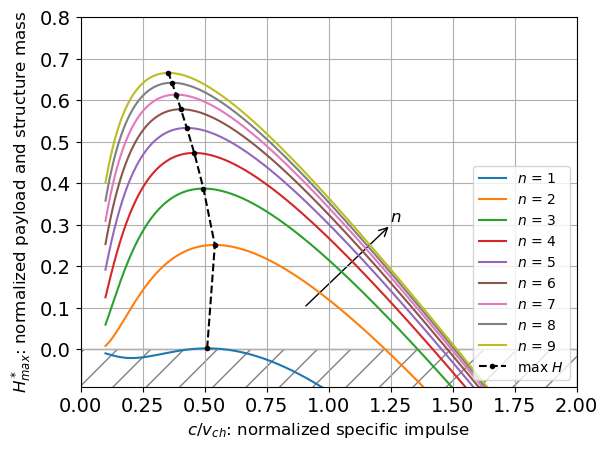

In [6]:
y=0.8
x_vec=np.arange(.1,2,0.001)
n_vec=np.arange(1,10,1)

max_H=[]
opt_x=[]

fig=plt.plot(figsize=(8,8),dpi=150)
for n in n_vec:
    H_opt_old=opt_H(x_vec,y,n)
    max_H.append(np.max(H_opt_old))
    opt_x.append(x_vec[np.argmax(H_opt_old)])
        
    plt.plot(x_vec,H_opt_old,label=f"$n$ = {n}")
    
plt.plot(opt_x,max_H,"k.--",label=f"max $H$")
    
    
aa=np.array([-1,-1])
plt.fill_between(np.array([0,2]), aa, where=(aa < 0), color='none', edgecolor='gray', hatch='/', interpolate=True)


start_point = (0.90, 0.1)  # Set the start point of the double arrow
end_point = (1.25, 0.3)    # Set the end point of the double arrow
arrow = FancyArrowPatch(start_point, end_point, arrowstyle='->',lw=1, mutation_scale=15, color='k')
plt.gca().add_patch(arrow)
plt.text(1.27, 0.30, r"$n$", ha='center', va='bottom', color='k', fontsize=12)
 
plt.xlim([0,2])
plt.ylim([-.09,.8])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('$c/v_{ch}$: normalized specific impulse',fontsize=12)  
plt.ylabel('$H^*_{max}$: normalized payload and structure mass',fontsize=12) 
plt.legend(loc="lower right")  
plt.grid(True)
plt.savefig("figures/electric/HvsC_refueling.eps",bbox_inches='tight')



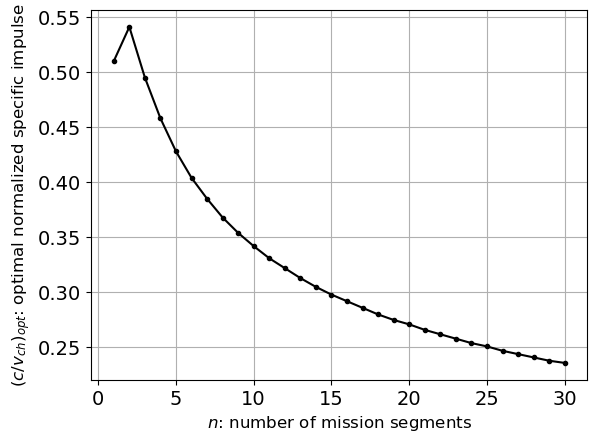

In [7]:
y=0.8
x_vec=np.arange(.01,2,0.001)
n_vec=np.arange(1,31,1)

max_H=[]
opt_x=[]
for n in n_vec:
    H_opt=opt_H(x_vec,y,n)
    max_H.append(np.max(H_opt))
    opt_x.append(x_vec[np.argmax(H_opt)])
        
    
plt.plot(n_vec,opt_x,"k.-")
plt.xlabel('$n$: number of mission segments',fontsize=12) 
plt.ylabel('$(c/v_{ch})_{opt}$: optimal normalized specific impulse',fontsize=12)   
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("figures/electric/optc_vsn.eps",bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

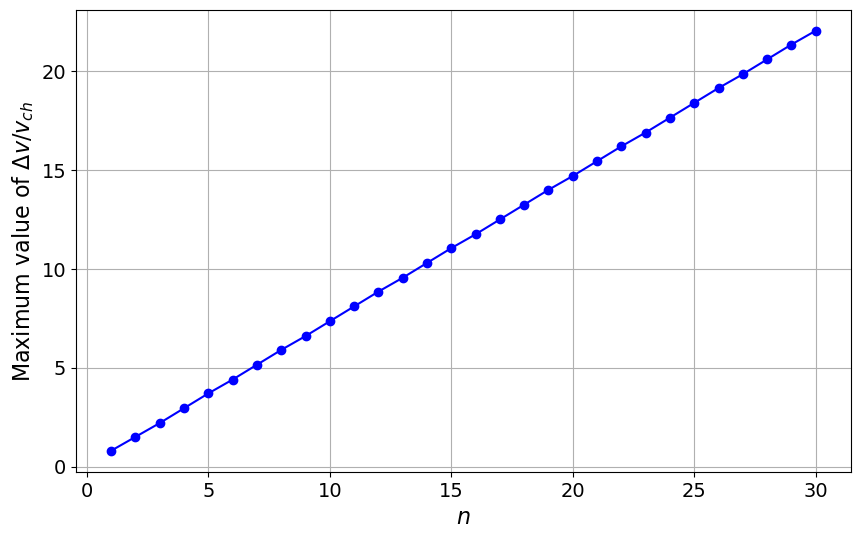

In [8]:
y_vec=np.arange(0,25,0.05)
x_vec=np.arange(.1,2,0.001)
n_vec=np.arange(1,31,1)


y_closest_to_zero = {}

for n in n_vec:
    max_H=[]
    for y in y_vec:
        H_opt_old=opt_H(x_vec,y,n)
        max_H.append(np.max(H_opt_old)) 
    # Find the r1 value where H is closest to 0
    closest_index = np.argmin(np.abs(max_H))
    y_closest_to_zero[n] = y_vec[closest_index]
    
    
 # Plot r1_closest_to_zero vs beta
fig=plt.figure(figsize=(10,6)) 
n = list(y_closest_to_zero.keys())
y_vals = list(y_closest_to_zero.values())

plt.figure(figsize=(10, 6))
plt.plot(n, y_vals, 'ob-')
#plt.xlim([0,1.01])

plt.xlabel(r'$n$',fontsize=16)
plt.ylabel(r'Maximum value of $\Delta v/v_{ch}$',fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
#plt.savefig("figures/electric/max_delv.png")

plt.show()

# Optimization of $\tau$ as a function of $n$

In [9]:
def max_tau(x,y,n):
    return n*(1-np.exp(-(1/n)*y/x))/(1-np.exp(-y/x))

def analytical_lim_tau(x,y):
    return y/x/(1-np.exp(-y/x))

In [10]:
y=.8
x=.4
n=np.arange(1,41,1)

tau_max=max_tau(x,y,n)
limit_tau=analytical_lim_tau(x,y)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


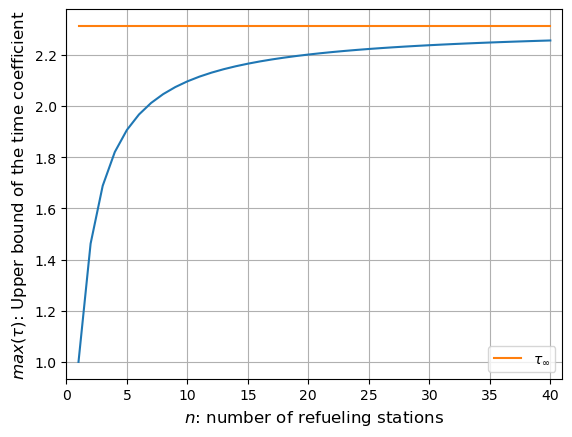

In [11]:
fig=plt.plot(figsize=(8,8))
plt.plot(n,tau_max)
plt.plot(np.array([n[0],n[-1]]),np.array([limit_tau,limit_tau]),label=r"$\tau_{\infty}$")

plt.xlabel(r'$n$: number of refueling stations',fontsize=12)  
plt.ylabel(r'$max(\tau)$: Upper bound of the time coefficient',fontsize=12)   
plt.xlim([0,n[-1]+1])
plt.grid(True)
plt.legend(loc="lower right")
plt.savefig("figures/electric/tau_vs_n.eps",bbox_inches='tight')

# SMART1 mission

In [12]:
# Reported values
mpay=18.9 #kg
mp=82 #kg
mps=96.3 #kg
ms=169.7 #kg
m0=366.9 #kg
P=1190 #W
isp=1640 #s
thrust= 68*1e-3 #N 
delv=3900 #m/s
time= 7 # months


# Calculated values-
H= (mpay+ms)/m0 ;    print("H_smrt1=",H)
f= mp/(mpay+ms);     print("f_smrt1=",f)
tf= time*30*24*3600; print("tf_smrt1=",tf)
c= isp*9.81; print("c=",c)
mdot=thrust/c ; print("mdot=",mdot)
mp=m0*(1-np.exp(-delv/c))
tf_calc=mp/mdot
Pjet= 0.50*thrust*c ;   print("Pjet=",Pjet)
eta= Pjet/P ;   print("eta=",eta)
alpha=mps/P ;   print("alpha=",alpha)
vch=np.sqrt(2*eta*tf/alpha); print("vch=",vch)
y=delv/vch; print("y=",y)
x=c/vch; print("x=",x)
print("___________________________")
H_th=opt_H(x,y,1);    print("H_th=",H_th)
H_inf=H_infty(x,y) ; print("H_inf=",H_inf)
tau_inf=analytical_lim_tau(x,y) ; print("tau_inf=",tau_inf)

H_smrt1= 0.5140365222131371
f_smrt1= 0.43478260869565216
tf_smrt1= 18144000
c= 16088.400000000001
mdot= 4.226647771064867e-06
Pjet= 547.0056000000001
eta= 0.4596685714285715
alpha= 0.08092436974789916
vch= 14357.018470576892
y= 0.2716441444992646
x= 1.1205947831697356
___________________________
H_th= 0.5144170817608917
H_inf= 0.7296832456610532
tau_inf= 1.1260974627669385


In [13]:
tf_calc=mp/mdot
tf_calc/3600

5190.688001261433

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


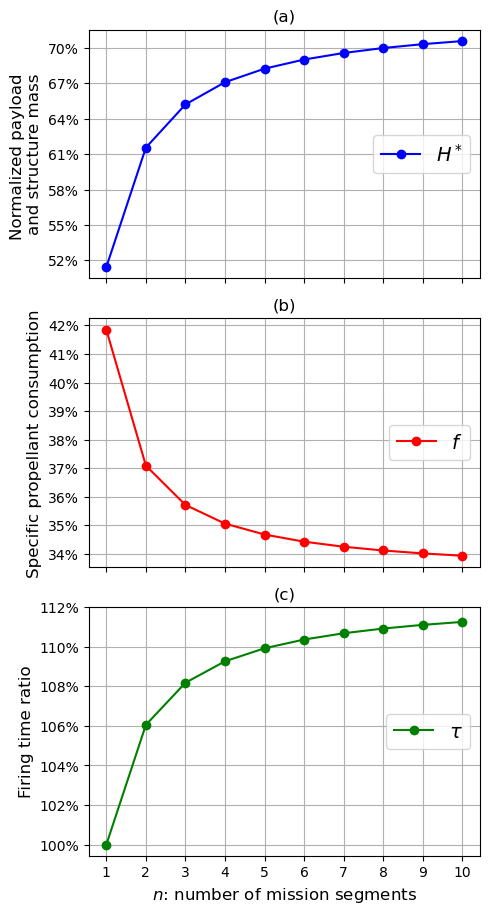

In [14]:
n_segments=np.array([1,2,3,4,5,6,7,8,9,10])

H_n=opt_H(x,y,n_segments)
tau_n=max_tau(x,y,n_segments)
f_n=tau_n/H_n * (1-np.exp(-y/x))


fig, axs = plt.subplots(3, 1, figsize=(5, 9), sharex=True)
# Plot on each subplot
axs[0].plot(n_segments, H_n,'o-', label=r'$H^*$', color='blue')
axs[0].set_title('(a)')
axs[0].legend(loc="right",fontsize=14)
axs[0].grid(True)
axs[0].set_xticks(np.arange(0, 11, 1))
axs[0].set_yticks(np.arange(.52, .73, .03))
axs[0].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
axs[0].set_ylabel("Normalized payload \nand structure mass",fontsize=12)




axs[1].plot(n_segments, f_n,'o-', label=r'$f$', color='red')
axs[1].set_title('(b)')
axs[1].legend(loc="right",fontsize=14)
axs[1].grid(True)
axs[1].set_yticks(np.arange(.34, .43, .01))
axs[1].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
axs[1].set_ylabel("Specific propellant consumption",fontsize=12)



axs[2].plot(n_segments, tau_n,'o-', label=r'$\tau$', color='green')
axs[2].set_title('(c)')
axs[2].legend(loc="right",fontsize=14)
axs[2].grid(True)
axs[2].set_yticks(np.arange(1, 1.13, .02))
axs[2].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
axs[2].set_ylabel("Firing time ratio",fontsize=12)

# Adjust layout
plt.tight_layout()
# Set x-axis label for all
plt.xlabel(r'$n$: number of mission segments',fontsize=12)  
plt.savefig("figures/electric/smart1_refuel.eps",bbox_inches='tight')



In [15]:
# Reported values
mpay=18.9 #kg
mp=82 #kg
mps=96.3 #kg
ms=169.7 #kg
m0=366.9 #kg
P=1190 #W
isp=1640 #s
T= 68*1e-3 #N 
delv=3900 #m/s
tf_smart= 5000 # hours


def smart_refueling(isp,T,delv,n_segments,m0,tf_smart):
    
    c=isp*9.81 #m/s
    mdot=T/c # mass flow rate in kg/s
    mp=n_segments*m0*(1-np.exp(-(1/n_segments)*delv/c)) # total propellant mass in kg
    tf=mp/mdot # firing time in s
    vch=np.sqrt(2*eta*tf/alpha)
    x=c/vch
    y=delv/vch
    H=opt_H(x,y,n_segments)
    f=(mp/m0)/H

    return H,f,tf,mp

    

In [16]:
n_vec=np.arange(1,11,1)

H_vec=[]
f_vec=[]
tf_vec=[]
tau_vec=[]
mp_vec=[]

for n in n_vec:
    H,f,tf,mp = smart_refueling(isp,T,delv,n,m0,tf_smart)
    H_vec.append(H)
    f_vec.append(f)
    tf_vec.append(tf)
    tau_vec.append(tf/tf_vec[0])
    mp_vec.append(mp)


Text(0.5, 69.7222222222222, '$n$: number of mission segments')

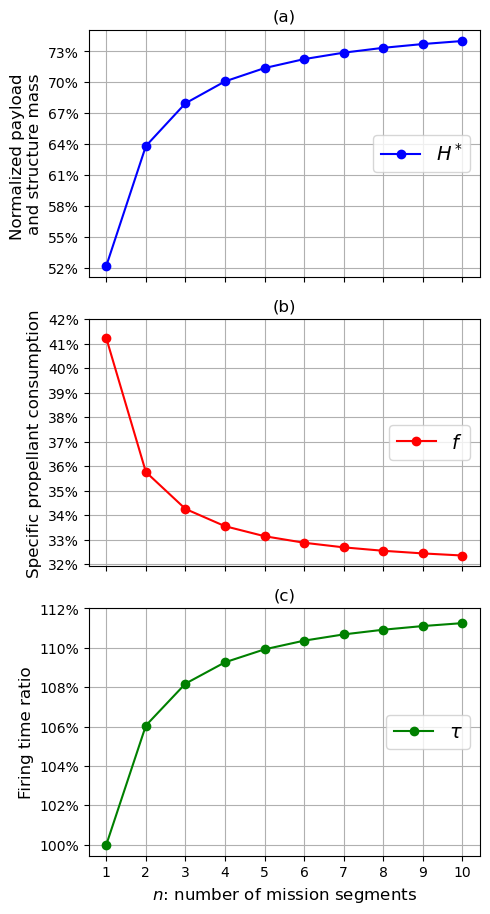

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(5, 9), sharex=True)
# Plot on each subplot
axs[0].plot(n_vec, np.array(H_vec),'o-', label=r'$H^*$', color='blue')
axs[0].set_title('(a)')
axs[0].legend(loc="right",fontsize=14)
axs[0].grid(True)
axs[0].set_xticks(np.arange(0, 11, 1))
axs[0].set_yticks(np.arange(.52, .75, .03))
axs[0].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
axs[0].set_ylabel("Normalized payload \nand structure mass",fontsize=12)



axs[1].plot(n_vec, f_vec,'o-', label=r'$f$', color='red')
axs[1].set_title('(b)')
axs[1].legend(loc="right",fontsize=14)
axs[1].grid(True)
axs[1].set_yticks(np.arange(.32, .43, .01))
axs[1].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
axs[1].set_ylabel("Specific propellant consumption",fontsize=12)



axs[2].plot(n_vec, tau_vec,'o-', label=r'$\tau$', color='green')
axs[2].set_title('(c)')
axs[2].legend(loc="right",fontsize=14)
axs[2].grid(True)
axs[2].set_yticks(np.arange(1, 1.14, .02))
axs[2].yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
axs[2].set_ylabel("Firing time ratio",fontsize=12)

# Adjust layout
plt.tight_layout()
# Set x-axis label for all
plt.xlabel(r'$n$: number of mission segments',fontsize=12)  
#plt.savefig("figures/electric/smart1_refuel.eps",bbox_inches='tight')


# Finding optimal thruster

In [18]:
c= 1640*9.81 # exhaust velocity in m/s
Pjet= eta*P
T=2*Pjet/c # Thrust in N
mdot=T/c # mass flow rate in kg/s
n_segments=10
mp=n_segments*m0*(1-np.exp(-(1/n_segments)*delv/c)) # total propellant mass in kg
tf=mp/mdot # firing time in s

In [654]:
def smart1_thruster (c_vec,T_vec,delv,n_segments,alpha,eta,m0,tf_smart):
        
    H_matrix = np.zeros((len(c_vec), len(T_vec)))
    f_matrix = np.zeros((len(c_vec), len(T_vec)))
    tau_matrix = np.zeros((len(c_vec), len(T_vec)))
    Pjet_matrix = np.zeros((len(c_vec), len(T_vec)))
    unity_matrix = np.zeros((len(c_vec), len(T_vec)))
    
    for i, c in enumerate(c_vec):
        for j, T in enumerate(T_vec):
            Pjet=0.5*c*T
            P=Pjet/eta
            mps=alpha*P
            mp_seg= m0*(1-np.exp(-(1/n_segments)*delv/c)) #  propellant mass in kg at a given segment
            mp_total=n_segments*mp_seg # total propellant mass in kg
            
            H= 1-(mps-mp_seg)/m0
            f=(mp_total/m0)/H
            
                      
            mdot=T/c # mass flow rate in kg/s
            tf=mp_total/mdot # firing time in s
            
            vch=np.sqrt(2*eta*tf/alpha)
            x=c/vch
            y=delv/vch
            H=opt_H(x,y,n_segments)
            f=(mp/m0)/H
            tau=tf/tf_smart
            H_matrix[i, j] = H
            f_matrix[i, j] = f
            tau_matrix[i, j] = tau
            
            
            Pjet_calculated=0.5*T*c
            mps=alpha*Pjet_calculated/eta
            unity=H+(mp)/m0
            unity_matrix[i, j] =unity
            #Pjet_matrix[i, j] = Pjet_calculated

    return c_vec, T_vec, H_matrix, f_matrix, tau_matrix,unity_matrix


# eee

## 

In [68]:
def smart1_thruster (c_vec,T_vec,delv,n_segments,alpha,eta,m0,tf_smart):
        
    H_matrix = np.zeros((len(c_vec), len(T_vec)))
    f_matrix = np.zeros((len(c_vec), len(T_vec)))
    tau_matrix = np.zeros((len(c_vec), len(T_vec)))
    
    for i, c in enumerate(c_vec):
        for j, T in enumerate(T_vec):
            Pjet=0.5*c*T
            P=Pjet/eta
            mps=alpha*P
            mp_seg= m0*(1-np.exp(-(1/n_segments)*delv/c)) #  propellant mass in kg at a given segment
            mp_total=n_segments*mp_seg # total propellant mass in kg
            
            H= 1-(mps+mp_seg)/m0
            f=(mp_total/m0)/H
            
                      
            mdot=T/c # mass flow rate in kg/s
            tf=mp_total/mdot # firing time in s
            tau=tf/tf_smart
            
            H_matrix[i, j] = H
            f_matrix[i, j] = f
            tau_matrix[i, j] = tau
            
            


    return H_matrix, f_matrix, tau_matrix, mp_total,mps


In [76]:
P=1190 # Power in Watt
delv=3900 #m/s
n_segments=1
alpha=0.08
eta= 0.46
m0=366.9 #kg
tf_smart= 7*30*24*3600 # time of Smart 1 in seconds


c_vec=np.arange(10000, 30001, 1000)
T_vec=np.arange(10e-3, 100e-3, 10e-3)


H_matrix, f_matrix, tau_matrix , mp_total,mps = smart1_thruster (c_vec,T_vec,delv,n_segments,alpha,eta,m0,tf_smart)

g_vec=c_vec/9.81
T_vec= T_vec*1000 # Conversion to mN

In [77]:
#np.shape(H_matrix)
#print(H_matrix)
#print(mp_total)
#print(mps)


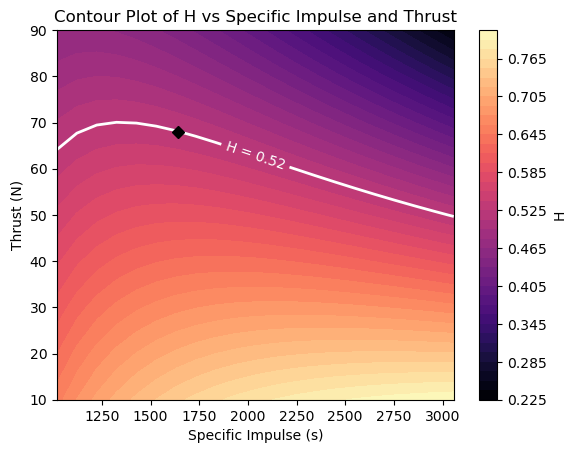

In [83]:
G, T = np.meshgrid(g_vec, T_vec)
# Create the contour plot
fig, ax = plt.subplots()
contour = ax.contourf(G, T, H_matrix.T, levels=50, cmap='magma')  # Use .T to align dimensions
cbar = fig.colorbar(contour)
cbar.set_label('H')


# Overlay the specific contour line
specific_contour = ax.contour(G, T, H_matrix.T, levels=[0.525], colors='white', linewidths=2)
ax.clabel(specific_contour, inline=True, fontsize=10, fmt=lambda x: f'H = {0.52:.2f}')

ax.plot(1640, 68, 'kD', markersize=6, label='Point (c=1640s, T=68mN)')

# Add labels and title
ax.set_xlabel('Specific Impulse (s)')
ax.set_ylabel('Thrust (N)')
ax.set_title('Contour Plot of H vs Specific Impulse and Thrust')
plt.show()

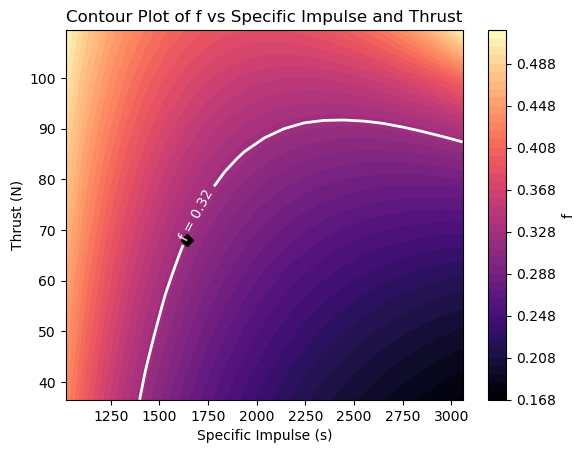

In [ ]:
# Create the contour plot
fig, ax = plt.subplots()
contour = ax.contourf(G, T, f_matrix.T, levels=50, cmap='magma')  # Use .T to align dimensions
cbar = fig.colorbar(contour)
cbar.set_label('f')



# Overlay the specific contour line
specific_contour = ax.contour(G, T, f_matrix.T, levels=[f_vec[-1]], colors='white', linewidths=2)
ax.clabel(specific_contour, inline=True, fontsize=10, fmt=lambda x: f'f = {f_vec[-1]:.2f}')
ax.plot(1640, 68, 'kD', markersize=6, label='Point (c=1640s, T=68mN)')

# Add labels and title
ax.set_xlabel('Specific Impulse (s)')
ax.set_ylabel('Thrust (N)')
ax.set_title('Contour Plot of f vs Specific Impulse and Thrust')
plt.show()

TypeError: Input z must be at least a (2, 2) shaped array, but has shape (1, 21)

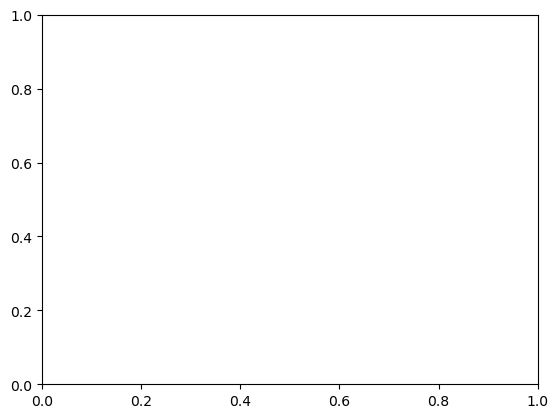

In [601]:
# Create the contour plot
fig, ax = plt.subplots()
contour = ax.contourf(G, T, tau_matrix.T, levels=50, cmap='magma')  # Use .T to align dimensions
cbar = fig.colorbar(contour)
cbar.set_label(r'$\tau$')




# Overlay the specific contour line
specific_contour = ax.contour(G, T, tau_matrix.T, levels=[tau_vec[-1]+0.03], colors='white', linewidths=2)
ax.clabel(specific_contour, inline=True, fontsize=10, fmt=lambda x: f'tau = {tau_vec[-1]:.2f}')
ax.plot(1640, 68, 'kD', markersize=6, label='Point (c=1640s, T=68mN)')


# Add labels and title
ax.set_xlabel('Specific Impulse (s)')
ax.set_ylabel('Thrust (N)')
ax.set_title(r'Contour Plot of $\tau$ vs Specific Impulse and Thrust')
plt.show()

# Find thruster at constant Pjet

In [504]:
def smart1_thruster (c_vec,P,delv,n_segments,alpha,eta,m0,tf_smart):
    
    
    Pjet= eta*P
    T_vec=2*Pjet/c_vec # Thrust in N
 
    
    H_matrix = []
    f_matrix = []
    tau_matrix = []
    Pjet_matrix = []
    unity_matrix = []
    
    for c in c_vec:
        T=2*Pjet/c # Thrust in N
        mdot=T/c # mass flow rate in kg/s
        mp=n_segments*m0*(1-np.exp(-(1/n_segments)*delv/c)) # total propellant mass in kg
        tf=mp/mdot # firing time in s
        vch=np.sqrt(2*eta*tf/alpha)
        x=c/vch
        y=delv/vch
        H=opt_H(x,y,n_segments)
        f=(mp/m0)/H
        tau=tf/tf_smart
        H_matrix.append(H)
        f_matrix.append(f)
        tau_matrix.append(tau)
        
        
        Pjet_calculated=0.5*T*c
        Pjet_matrix.append(Pjet_calculated)
    

    return T_vec, H_matrix, f_matrix, tau_matrix,  Pjet_matrix


In [567]:
P=1190 # Power in Watt
delv=3900 #m/s
n_segments=1
alpha=0.08
eta= 0.46
m0=366.9 #kg
tf_smart= 7*30*24*3600 # Smart 1 in seconds

c_vec=np.arange(10000, 30001, 1000) # exhaust velocity in m/s

T_vec, H_matrix, f_matrix, tau_matrix, Pjet_matrix= smart1_thruster (c_vec,P,delv,n_segments,alpha,eta,m0,tf_smart)
g_vec=c_vec/9.81
T_vec= T_vec*1000 # Conversion to mN

In [593]:
n_segments=1
c_vec=np.arange(10000, 30001, 1000) # exhaust velocity in m/s
T_vec=2*Pjet/c_vec # Thrust in N
mdot=T_vec/c_vec # mass flow rate in kg/s
mp=n_segments*m0*(1-np.exp(-(1/n_segments)*delv/c_vec)) # total propellant mass in kg
tf_vec=mp/mdot
vch=np.sqrt(2*eta*tf/alpha)
x=c/vch
y=delv/vch
H_vec=opt_H(x,y,n_segments)
f_vec=(mp/m0)/H_vec
tau_vec=tf_vec/tf_smart

In [594]:
tf_vec/3600

array([ 3008.49633661,  3364.84026254,  3722.2549074 ,  4080.5115784 ,
        4439.44231451,  4798.92100103,  5158.85111243,  5519.15752168,
        5879.78088579,  6240.67370974,  6601.7975318 ,  6963.12087434,
        7324.61772815,  7686.26641477,  8048.04872145,  8409.94923545,
        8771.95482601,  9134.05423719,  9496.23776492,  9858.49699847,
       10220.82461204])

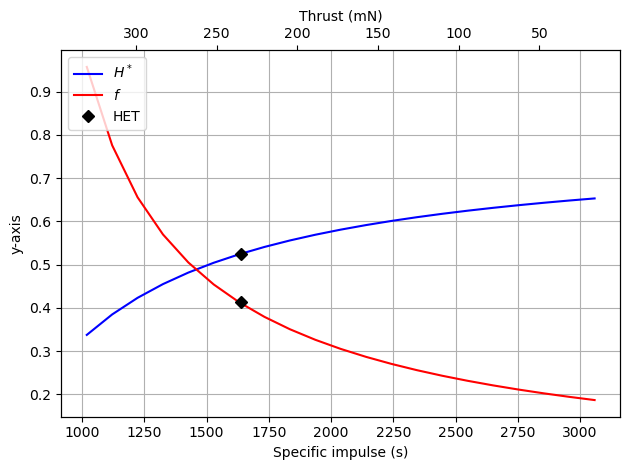

In [597]:
# Create the main figure and axis
fig, ax1 = plt.subplots()

# Plot the curve on the bottom x-axis
ax1.plot(c_vec/9.81, H_vec, label=r"$H^*$", color="blue")
ax1.plot(np.array([1640]), H_vec[6], 'D', color="k")

ax1.plot(c_vec/9.81, f_vec, label=r"$f$", color="red")
ax1.plot(np.array([1640]), f_vec[6], 'D',label="HET", color="k")

#ax1.plot(c_vec/9.81, tau_vec, label=r"$\tau$", color="green")
#ax1.plot(np.array([1640]), tau_vec[6], 'D', color="k")


ax1.set_xlabel("Specific impulse (s)")
ax1.set_ylabel("y-axis")
ax1.legend(loc="upper left")
ax1.grid(True)
# Create a secondary x-axis at the top
ax2 = ax1.twiny()

# Align the secondary x-axis with the top
ax2.set_xlim(1000*2*Pjet / ax1.get_xlim()[1], 1 / ax1.get_xlim()[0])  # Inverse of the bottom axis limits
ax2.set_xlabel("Thrust (mN)")

# Adjust layout to avoid overlap
fig.tight_layout()

# Show the plot
plt.show()




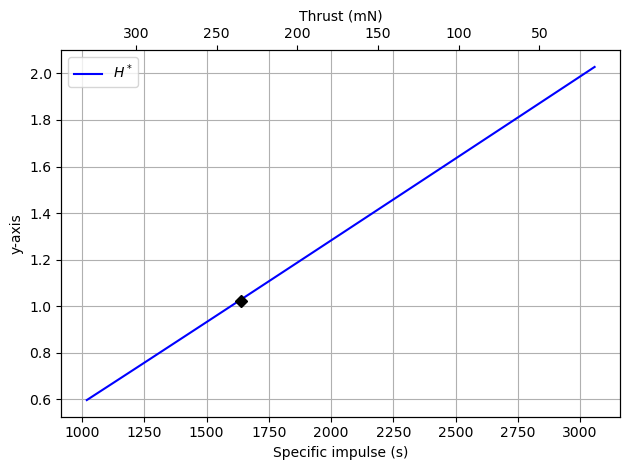

In [596]:
# Create the main figure and axis
fig, ax1 = plt.subplots()

# Plot the curve on the bottom x-axis
ax1.plot(c_vec/9.81, tau_vec, label=r"$H^*$", color="blue")
ax1.plot(np.array([1640]), tau_vec[6], 'D', color="k")


ax1.set_xlabel("Specific impulse (s)")
ax1.set_ylabel("y-axis")
ax1.legend(loc="upper left")
ax1.grid(True)
# Create a secondary x-axis at the top
ax2 = ax1.twiny()

# Align the secondary x-axis with the top
ax2.set_xlim(1000*2*Pjet / ax1.get_xlim()[1], 1 / ax1.get_xlim()[0])  # Inverse of the bottom axis limits
ax2.set_xlabel("Thrust (mN)")

# Adjust layout to avoid overlap
fig.tight_layout()

# Show the plot
plt.show()




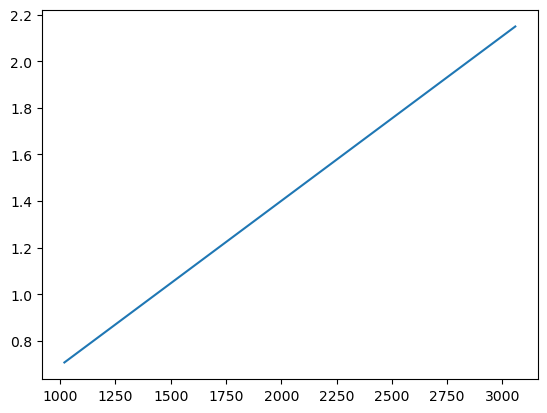

In [571]:
plt.plot(c_vec/9.81,tau_vec)

In [ ]:
print(c_vec[6])
print(T_vec[6])
print(mp[6])
print(tf[6]/3600)
print(vch[6])
print(x[6])
print(y[6])
print(H_vec[6])
print(f_vec[6])
print(tau_vec[6])